In [4]:
from operator import mod
import numpy as np
import pulse2percept as p2p
from matplotlib import pyplot as plt
from swarm_helpers import particle_swarm
from implant_helpers import build_implant

import pyswarms as ps
import pyswarms.backend as P
from pyswarms.backend.swarms import Swarm
from pyswarm import pso
import json

In [5]:
# Create model and implant
%matplotlib inline

model = p2p.models.AxonMapModel(xrange= (-2.5, 2), yrange= (-2,2), xystep= 0.02, rho=75) 
model.build()

# Bounds 
bound_params = {
  'x': (-2500, 2000),
  'y': (-2000, 2000)
}
o_lb = [v[0] for v in bound_params.values()]
o_ub = [v[1] for v in bound_params.values()]
    
overlap_bounds = (o_lb, o_ub)


In [7]:
TRIAL_NUMBER = 1 #change to whatever number we agree on
NUM_ITERATIONS = 5
NUM_PARTICLES = 2

data = open('data.json')
experiments = json.load(data)
data.close()

for num_electrodes in experiments:
    print(num_electrodes)
    for electrode_size in experiments[num_electrodes]:
        print(electrode_size)
        for loss_func in experiments[num_electrodes][electrode_size]:
            print(loss_func)
            search_params = {}
            for electrode in range(int(num_electrodes)):
            
                search_params["x" + str(electrode)] = (-2500, 2000)
                search_params["y" + str(electrode)] = (-2000, 2000)

            lb = [v[0] for v in search_params.values()]
            ub = [v[1] for v in search_params.values()]

            bounds = (lb, ub)
            # print(bounds)
            # Maximize number of effective electrodes
            best_positions, best_cost = particle_swarm(num_electrodes, electrode_size, NUM_PARTICLES, NUM_ITERATIONS, bounds, overlap_bounds, model, experiments, loss_func) 

20
100
loss_func_1
[18]
[18, 15]
[18, 15, 11]
[18, 15, 11, 11]
[18, 15, 11, 11, 11]
loss_func_2


NameError: name 'loss_func_2' is not defined

<AxesSubplot:xlabel='x (microns)', ylabel='y (microns)'>

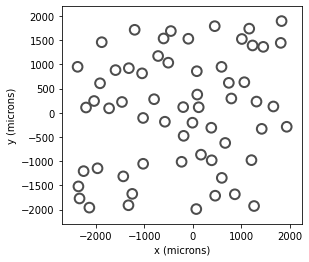

In [ ]:
best_implant = build_implant(best_positions)

best_implant.plot()
#model.plot()

# best_implant.stim = np.eye(best_implant.n_electrodes)
# model.predict_percept(best_implant).play()

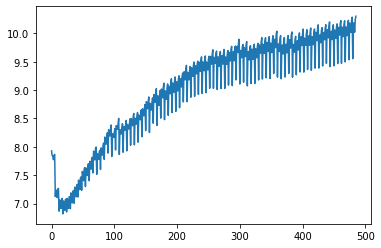

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train = np.load('val_loss_values.npy')

plt.plot(train)
plt.show()
# train